## Project 2 Monte Carlo Simulation - lex_trade_io



### Import Dependencies

In [1]:
# Import libraries and dependencies
import os
import pandas as pd
import yfinance as yf
from MCForecastTools import MCSimulation

In [2]:
# Import warnings to ignore warnings
import warnings

warnings.filterwarnings('ignore')

In [3]:
# import yfinance "SPY"

spy = yf.Ticker("SPY")


In [4]:
# import yfinance "AGG"

agg = yf.Ticker("AGG")


### Get Past 6 months worth of SP500 and AGGPrice Data via Y Finance

In [5]:
# Set the ticker information
tickers = ["SPY","AGG"]

# Set timeframe to "15Min"
timeframe = "15Min"

# Set start and end datetimes between now and 6 month back.
# start_date = pd.Timestamp("2023-07-11", tz="America/New_York").isoformat()
# end_date = pd.Timestamp("2023-08-02", tz="America/New_York").isoformat()



# Get 6 month's worth of historical price data for SP500 and GOVT
SPY = yf.download("SPY", period="6mo")
    # tickers,
    # timeframe,
    # start=start_date,
    # end=end_date
# ).df

# # Display sample data
# display(df_ticker.head())
# display(df_ticker.tail())

[*********************100%%**********************]  1 of 1 completed


In [6]:
# Rewrite the column names
columns = ["open", "high", "low", "close", "adj close", "volume"]
SPY.columns = columns
SPY.head()

,open,high,low,close,adj close,volume
Date,,,,,,
2023-04-05,407.910004,408.700012,405.880005,407.600006,404.664154,65200200
2023-04-06,406.769989,409.480011,405.679993,409.190002,406.242706,63743300
2023-04-10,406.609985,409.690002,405.970001,409.609985,406.659668,63681000
2023-04-11,410.260010,411.179993,408.920013,409.720001,406.768860,59297900
2023-04-12,411.869995,412.170013,407.440002,408.049988,405.110901,86420400


In [7]:
AGG= yf.download("AGG", period="5mo")

[*********************100%%**********************]  1 of 1 completed


In [8]:
# Rewrite the column names
columns = ["open", "high", "low", "close", "adj close", "volume"]
AGG.columns = columns
AGG.head()

,open,high,low,close,adj close,volume
Date,,,,,,
2023-05-05,99.639999,99.720001,99.449997,99.650002,98.326515,4003000
2023-05-08,99.209999,99.349998,99.080002,99.099998,97.783798,5481300
2023-05-09,99.110001,99.190002,99.010002,99.010002,97.695007,5712200
2023-05-10,99.430000,99.680000,99.389999,99.650002,98.326515,4803000
2023-05-11,100.110001,100.190002,99.879997,99.949997,98.622520,7703800


In [9]:
# Concatenate the ticker DataFrames
df_ticker = pd.concat([SPY, AGG], axis=1, keys=["SPY", "AGG"])

# Display sample data
df_ticker.info

<bound method DataFrame.info of                    SPY                                                  \
                  open        high         low       close   adj close   
Date                                                                     
2023-04-05  407.910004  408.700012  405.880005  407.600006  404.664154   
2023-04-06  406.769989  409.480011  405.679993  409.190002  406.242706   
2023-04-10  406.609985  409.690002  405.970001  409.609985  406.659668   
2023-04-11  410.260010  411.179993  408.920013  409.720001  406.768860   
2023-04-12  411.869995  412.170013  407.440002  408.049988  405.110901   
...                ...         ...         ...         ...         ...   
2023-09-28  425.480011  430.250000  424.869995  428.519989  428.519989   
2023-09-29  431.670013  431.850006  425.910004  427.480011  427.480011   
2023-10-02  426.619995  428.600006  424.459991  427.309998  427.309998   
2023-10-03  425.059998  427.369995  420.179993  421.589996  421.589996   
2023-1

<Axes: xlabel='Date'>

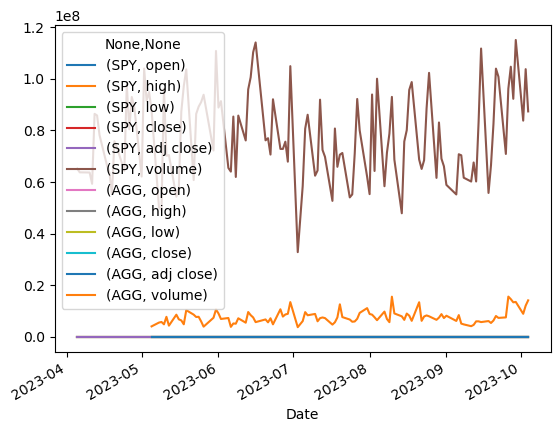

In [10]:
# Plot daily returns of all portfolios
display(df_ticker.plot())

In [11]:
# # Configuring a Monte Carlo simulation to forecast 6 months cumulative returns
# # use 500 runs and 40(AGG)/60(SPY) portfolio.
# MC_six_months = MCSimulation(portfolio_data = 
#     df_ticker,
#     # portfolio_data = pd.DataFrame,
#     weights = [.40, .60],
#     num_simulation = 500,
#     num_trading_days = 252
# )

In [12]:
#Create statement to pair 1-5 portfolio classification with corresponding portfolio weight

# obtain strategy ('conservative' | 'moderately conservative' | 'moderate' | 'moderately aggressive', | 'aggressive'

weights_mapping={"conservative": [1, 0], 
         "moderately conservative": [.60, .40], 
         "moderate": [.40, .60], 
         "moderately aggressive": [.20, .80], 
         "aggressive": [0, 1]}

strategy='aggressive'
weights=weights_mapping[strategy]

print(weights)

# MC_six_months = MCSimulation(portfolio_data = 
#     df_ticker,
#     # portfolio_data = pd.DataFrame,
#     weights = weights[strategy],
#     num_simulation = 500,
#     num_trading_days = 252
# )

# match strategy: 
#     case "conservative":
#         weights = [1, 0]
#     case "moderately conservative":
#         weights = [.60, .40]
#     case "moderate":
#         weights = [.40, .60]
#     case "moderately aggressive":
#         weights = [.20, .80]
#     case "aggressive":
#         weights = [0, 1]

[0, 1]


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 400.
count           500.000000
mean              1.085521
std               0.124095
min               0.784326
25%               1.002817
50%               1.077789
75%               1.163098
max               1.465034
95% CI Lower      0.850987
95% CI Upper      1.352591
Name: 252, dtype: float64
Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 400.
count           500.000000
mean              0.987325
std               0.074552
min               0.800008
25%               0.939066
50%               0.983606
75%               1.035724
max               1.228345
95% CI Lower      0.844829
95% CI Upper      1.130326
Name: 25

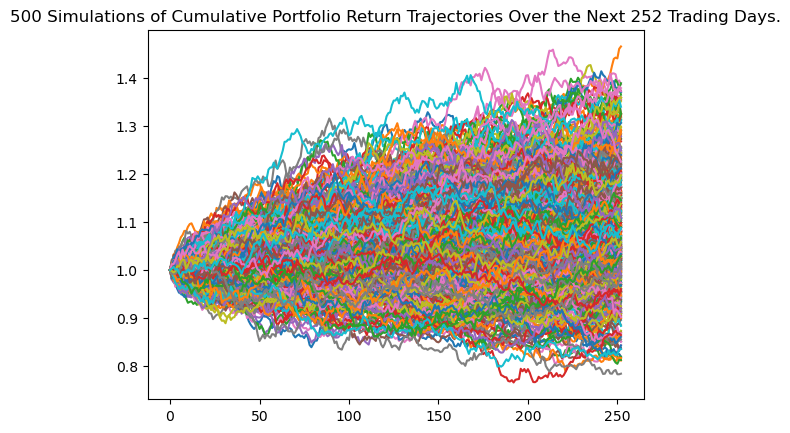

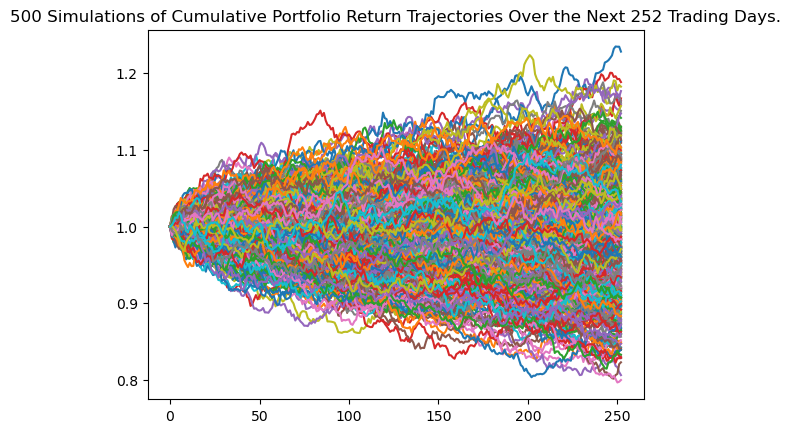

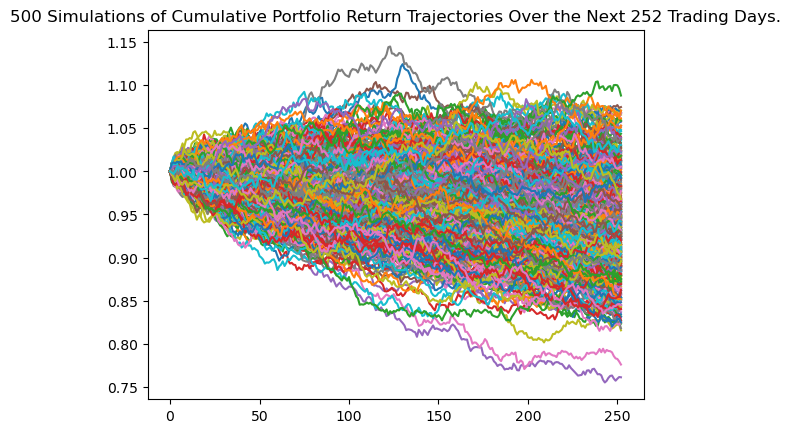

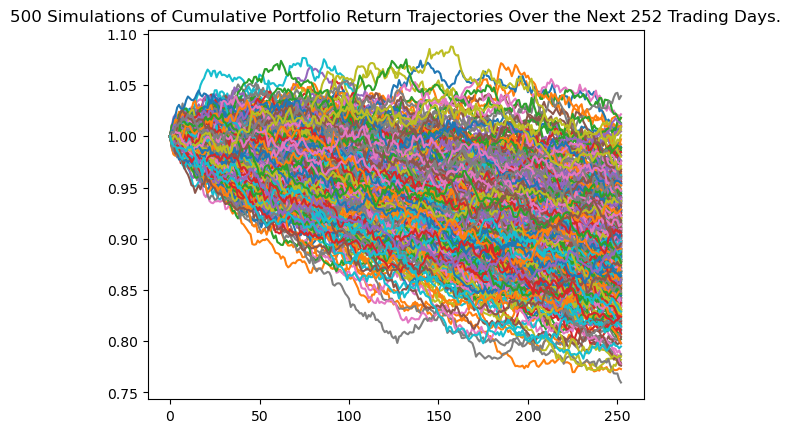

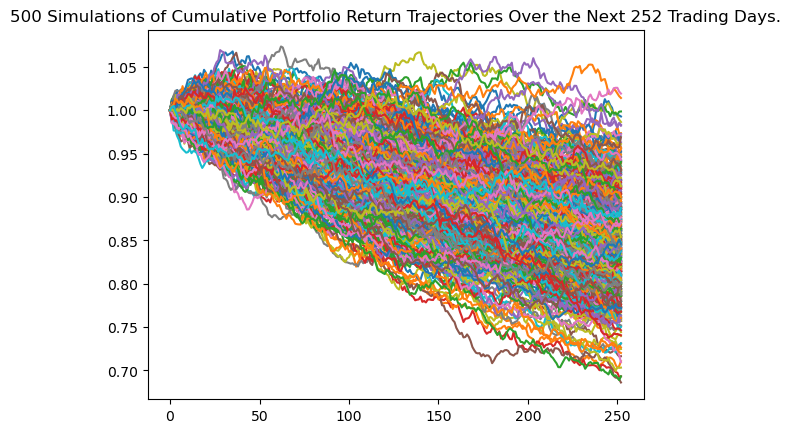

In [19]:
for each_strat in weights_mapping: 
    weights=weights_mapping[each_strat]
    MC_six_months = MCSimulation(portfolio_data = 
        df_ticker,
        weights = weights,
        num_simulation = 500,
        num_trading_days = 252
    )
    MC_six_months.calc_cumulative_return()
    # Fetch summary statistics from the Monte Carlo simulation results
    forecast_sumstat = MC_six_months.summarize_cumulative_return()

    # Print summary statistics
    print(forecast_sumstat)
    
    # Plot simulation outcomes
    MC_six_months.plot_simulation()

In [14]:
MC_six_months.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 400.


,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002570,1.002812,0.996529,0.996749,1.008371,1.000510,0.999318,0.999309,0.995241,1.004162,...,0.994072,0.999992,1.001872,1.000110,0.993612,0.997589,0.999741,0.997718,0.994206,0.998081
2,0.998663,0.997956,1.010859,0.997513,1.002876,0.997111,0.993892,1.006127,1.000913,1.009775,...,0.995199,0.999336,1.001099,1.003687,0.990846,0.997884,0.997484,1.001542,1.001066,0.997468
3,0.993431,0.998380,1.014906,0.996965,1.003085,0.996431,0.996480,1.001249,0.994946,1.010921,...,0.995152,1.003526,1.005781,0.995900,0.985816,0.994475,0.993987,1.001460,1.000727,1.000441
4,0.997146,0.989757,1.016154,0.990234,1.005408,0.994079,0.999414,0.996624,0.996158,1.010299,...,1.000422,1.008042,0.999831,0.992311,0.982524,0.999396,0.993494,1.007260,0.996449,0.995767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,0.955743,0.837134,0.846525,0.784057,0.862372,0.804151,0.939769,0.789226,0.826848,0.861319,...,0.809090,0.944271,0.922158,0.923847,0.877339,0.786836,0.844102,0.808482,0.913669,0.875529
249,0.961779,0.835860,0.841917,0.781931,0.864433,0.797770,0.936259,0.794187,0.824358,0.856728,...,0.811232,0.946935,0.925452,0.932824,0.872966,0.777557,0.847022,0.801518,0.912563,0.875469
250,0.963454,0.836641,0.846977,0.778458,0.865594,0.800615,0.941292,0.791041,0.822771,0.850646,...,0.812023,0.942723,0.932983,0.930624,0.874100,0.779630,0.848675,0.800071,0.908209,0.874581
251,0.947825,0.840087,0.848913,0.776704,0.863977,0.798989,0.945323,0.794226,0.823888,0.850968,...,0.813930,0.944909,0.934323,0.932598,0.872197,0.773565,0.848890,0.796132,0.907407,0.880756


In [15]:
# Printing the simulation input data
MC_six_months.portfolio_data.head()


SPY                                                  \
                  open        high         low       close   adj close   
Date                                                                     
2023-04-05  407.910004  408.700012  405.880005  407.600006  404.664154   
2023-04-06  406.769989  409.480011  405.679993  409.190002  406.242706   
2023-04-10  406.609985  409.690002  405.970001  409.609985  406.659668   
2023-04-11  410.260010  411.179993  408.920013  409.720001  406.768860   
2023-04-12  411.869995  412.170013  407.440002  408.049988  405.110901   

                                   AGG                                  \
              volume daily_return open high low close adj close volume   
Date                                                                     
2023-04-05  65200200          NaN  NaN  NaN NaN   NaN       NaN    NaN   
2023-04-06  63743300     0.003901  NaN  NaN NaN   NaN       NaN    NaN   
2023-04-10  63681000     0.001026  NaN  NaN NaN   NaN       NaN    NaN   
2023-04-11  59297900     0.000269  NaN  NaN NaN   NaN       NaN    NaN   
2023-04-12  86420400    -0.004076  NaN  NaN NaN   NaN       NaN    NaN   

                         
           daily_return  
Date                     
2023-04-05          NaN  
2023-04-06          NaN  
2023-04-10          NaN  
2023-04-11          NaN  
2023-04-12          NaN

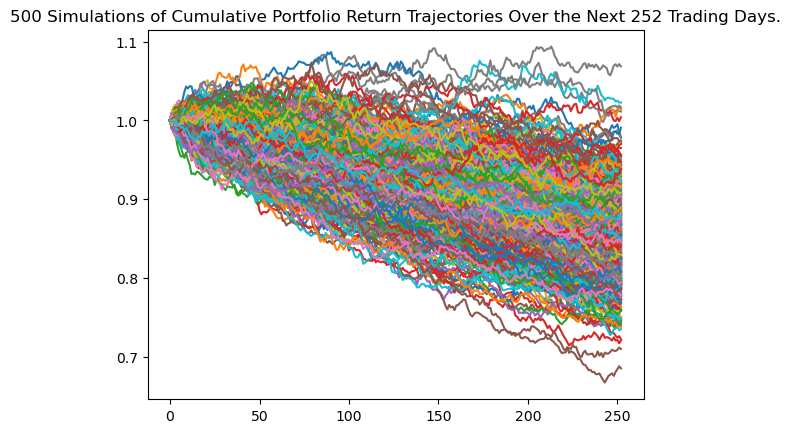

In [16]:
# Plot simulation outcomes
line_plot = MC_six_months.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC_sixmonths_sim_plot.png", bbox_inches="tight")

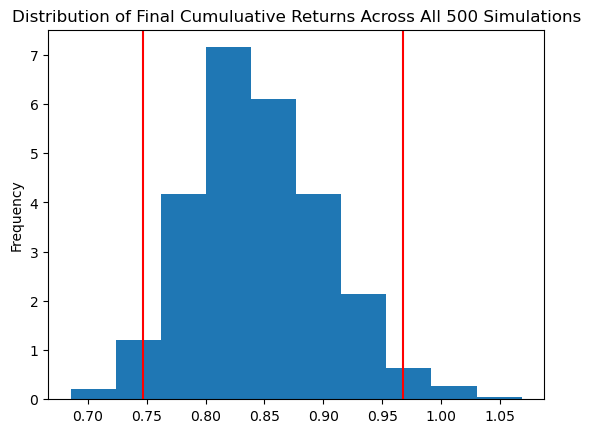

In [17]:
# Plot probability distribution and confidence intervals
dist_plot = MC_six_months.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_sixmonths_dist_plot.png',bbox_inches='tight')

In [18]:
# Fetch summary statistics from the Monte Carlo simulation results
forecast_sumstat = MC_six_months.summarize_cumulative_return()

# Print summary statistics
forecast_sumstat

count           500.000000
mean              0.846185
std               0.056509
min               0.685480
25%               0.805130
50%               0.842645
75%               0.881125
max               1.068447
95% CI Lower      0.746908
95% CI Upper      0.967727
Name: 252, dtype: float64